# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`. Trying `read_excel` the first time will probably not work, you'll get an error message. Be sure to read the error carefully: *you probably need to install a new library before it will work, and the error tells you what the library is named*.

In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
pd.read_excel('richpeople.xlsx')

df = pd.read_excel('richpeople.xlsx')

In [5]:
df

,year,name,rank,citizenship,countrycode,networthusbillion,selfmade,typeofwealth,gender,age,...,relationshiptocompany,foundingdate,gdpcurrentus,sourceofwealth,notes,notes2,source,source_2,source_3,source_4
0,2014,A. Jerrold Perenchio,663,United States,USA,2.6,self-made,executive,male,83.0,...,former chairman and CEO,1955.0,NaN,"television, Univision",represented Marlon Brando and Elizabeth Taylor,NaN,http://en.wikipedia.org/wiki/Jerry_Perenchio,http://www.forbes.com/profile/a-jerrold-perenc...,COLUMN ONE; A Hollywood Player Who Owns the Ga...,NaN
1,2014,Abdulla Al Futtaim,687,United Arab Emirates,ARE,2.5,inherited,inherited,male,NaN,...,relation,1930.0,NaN,"auto dealers, investments",company split between him and cousin in 2000,NaN,http://en.wikipedia.org/wiki/Al-Futtaim_Group,http://www.al-futtaim.ae/content/groupProfile.asp,NaN,NaN
2,2014,Abdulla bin Ahmad Al Ghurair,305,United Arab Emirates,ARE,4.8,inherited,inherited,male,NaN,...,relation,1960.0,NaN,diversified,inherited from father,NaN,http://en.wikipedia.org/wiki/Al-Ghurair_Group,http://www.alghurair.com/about-us/our-history,NaN,NaN
3,2014,Abdullah Al Rajhi,731,Saudi Arabia,SAU,2.4,self-made,self-made finance,male,NaN,...,founder,1957.0,NaN,banking,NaN,NaN,http://en.wikipedia.org/wiki/Al-Rajhi_Bank,http://www.alrajhibank.com.sa/ar/investor-rela...,http://www.alrajhibank.com.sa/ar/about-us/page...,NaN
4,2014,Abdulsamad Rabiu,1372,Nigeria,NGA,1.2,self-made,founder non-finance,male,54.0,...,founder,1988.0,NaN,"sugar, flour, cement",NaN,NaN,http://www.forbes.com/profile/abdulsamad-rabiu/,http://www.bloomberg.com/research/stocks/priva...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1648,2014,Zhu Yicai,1154,China,CHN,1.5,self-made,self-made finance,male,49.0,...,founder,1993.0,NaN,diversified,NaN,NaN,http://www.forbes.com/profile/zhu-yicai/,NaN,NaN,NaN
1649,2014,Ziyad Manasir,609,Russia,RUS,2.8,self-made,privatized and resources,male,48.0,...,founder,1992.0,NaN,construction,close ties with Gazprom,NaN,http://www.forbes.com/profile/ziyad-manasir/,http://www.themoscowtimes.com/business/article...,NaN,NaN
1650,2014,Ziyaudin Magomedov,1372,Russia,RUS,1.2,self-made,privatized and resources,male,45.0,...,founder,2004.0,NaN,"port, gas",NaN,NaN,http://www.summagroup.ru/about/history/en/,http://www.forbes.com/profile/ziyaudin-magomedov/,NaN,NaN
1651,2014,Zong Qinghou,94,China,CHN,11.6,self-made,founder non-finance,male,68.0,...,founder,1987.0,NaN,beverages,NaN,NaN,http://en.wikipedia.org/wiki/Zong_Qinghou,http://mic.com/articles/39659/zong-qinghou-chi...,NaN,NaN


## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [6]:
df.shape

(1653, 30)

In [7]:
df.dtypes

year                         int64
name                        object
rank                         int64
citizenship                 object
countrycode                 object
networthusbillion          float64
selfmade                    object
typeofwealth                object
gender                      object
age                        float64
industry                    object
IndustryAggregates          object
region                      object
north                        int64
politicalconnection        float64
founder                      int64
generationofinheritance     object
sector                      object
company                     object
companytype                 object
relationshiptocompany       object
foundingdate               float64
gdpcurrentus               float64
sourceofwealth              object
notes                       object
notes2                      object
source                      object
source_2                    object
source_3            

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [9]:
df_sorted = df.sort_values('networthusbillion', ascending=False)

top_10_richest = df_sorted.head(10)

print(top_10_richest[['name', 'networthusbillion']])

                  name  networthusbillion
184         Bill Gates               76.0
226   Carlos Slim Helu               72.0
79      Amancio Ortega               64.0
1562    Warren Buffett               58.2
862      Larry Ellison               48.0
339         David Koch               40.0
247       Charles Koch               40.0
1364   Sheldon Adelson               38.0
280     Christy Walton               36.7
724         Jim Walton               34.7


## 4a) How many male billionaires are there compared to the number of female billionares?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [10]:
gender_counts = df.groupby('gender').size()

print(gender_counts)

gender
female     180
male      1473
dtype: int64


## 4b) What percent is that?

In [11]:
total_billionaires = gender_counts.sum()
gender_percentages = (gender_counts / total_billionaires) * 100

print(gender_percentages)

gender
female    10.889292
male      89.110708
dtype: float64


## 4c) Is the average wealth different for a female billionaire as compared to a male billionaire?

In [12]:
female_billionaires = df[df['gender'] == 'female']

male_billionaires = df[df['gender'] == 'male']

avg_wealth_female = female_billionaires['networthusbillion'].mean()

avg_wealth_male = male_billionaires['networthusbillion'].mean()

print('Average wealth of female billionaires: {:.2f} billion'.format(avg_wealth_female))
print('Average wealth of male billionaires: {:.2f} billion'.format(avg_wealth_male))

Average wealth of female billionaires: 3.92 billion
Average wealth of male billionaires: 3.90 billion


## 5a) What is the most common source/type of wealth?

In [13]:
wealth_counts = df['typeofwealth'].value_counts()

most_common_wealth = wealth_counts.idxmax()

print("Most common source/type of wealth: ", most_common_wealth)

Most common source/type of wealth:  inherited


## 5b) Is the most common source/type of wealth different between men and women?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
>
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [14]:
wealth_counts = df.groupby('gender')['typeofwealth'].value_counts(normalize=True) * 100

most_common_wealth_female = wealth_counts['female'].idxmax()
most_common_wealth_male = wealth_counts['male'].idxmax()

print("Most common source/type of wealth for females: ", most_common_wealth_female)
print("Most common source/type of wealth for males: ", most_common_wealth_male)

Most common source/type of wealth for females:  inherited
Most common source/type of wealth for males:  founder non-finance


## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

Text(0.5, 1.0, 'Top 5 companies with the most billionaires')

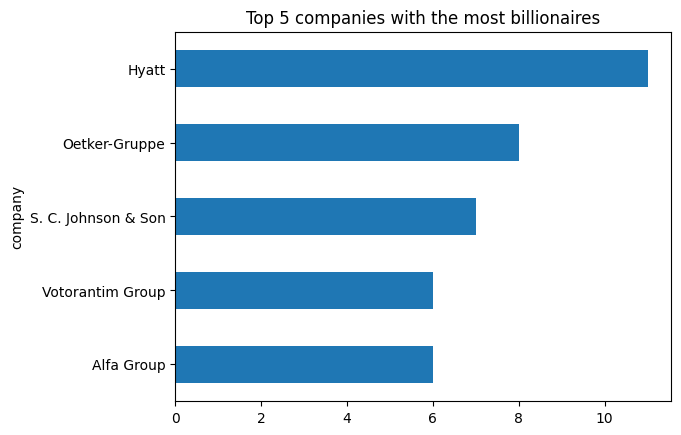

In [15]:
company_counts = df['company'].value_counts()

top_5_companies = company_counts.head(5).sort_values(ascending=True)

top_5_companies.plot(kind='barh')

plt.title('Top 5 companies with the most billionaires')

## 7) How much money do these top 5 billionaires have in total?

In [16]:
df_sorted = df.sort_values('networthusbillion', ascending=False)

top_5_billionaires = df_sorted.head(5)

total_wealth = top_5_billionaires['networthusbillion'].sum()

print('Total wealth of top 5 billionaires: $', total_wealth, ' billion')


Total wealth of top 5 billionaires: $ 318.2  billion


## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [17]:
country_wealth = df.groupby('countrycode')['networthusbillion'].sum()

sorted_country_wealth = country_wealth.sort_values(ascending=False)

top_10_countries_wealth = sorted_country_wealth.head(10)

print(top_10_countries_wealth)

countrycode
USA    2322.4
RUS     422.5
DEU     401.4
CHN     375.8
FRA     235.3
HKG     213.7
BRA     192.2
IND     191.9
ITA     158.1
GBR     152.0
Name: networthusbillion, dtype: float64


## 9a) How old is an average billionaire?

In [18]:
average_age = df['age'].mean()

print('Average age of billionaires: {:.1f}'.format(average_age))

Average age of billionaires: 63.3


## 9b) How old are self-made billionaires compared to non self-made billionaires? 

In [19]:
selfmade_billionaires = df[df['selfmade'] == 'self-made']

non_selfmade_billionaires = df[df['selfmade'] != 'self-made']

average_age_selfmade = selfmade_billionaires['age'].mean()

average_age_non_selfmade = non_selfmade_billionaires['age'].mean()

print('Average age of self-made billionaires: {:.1f}'.format(average_age_selfmade))
print('Average age of non self-made billionaires: {:.1f}'.format(average_age_non_selfmade))

Average age of self-made billionaires: 62.6
Average age of non self-made billionaires: 65.0


## 10a) Who are the three youngest billionaires? Who are the three oldest?

In [20]:
df_filtered = df.dropna(subset=['age'])

df_sorted_by_age = df_filtered.sort_values('age')

youngest_billionaires = df_sorted_by_age.head(3)

oldest_billionaires = df_sorted_by_age.tail(3)

print("Three youngest billionaires:")
print(youngest_billionaires[['name', 'age']])

print("\nThree oldest billionaires:")
print(oldest_billionaires[['name', 'age']])

Three youngest billionaires:
                  name   age
1172       Perenna Kei  24.0
397   Dustin Moskovitz  29.0
1004   Mark Zuckerberg  29.0

Three oldest billionaires:
                       name   age
836          Kirk Kerkorian  96.0
816           Karl Wlaschek  96.0
343  David Rockefeller, Sr.  98.0


## 10b) Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

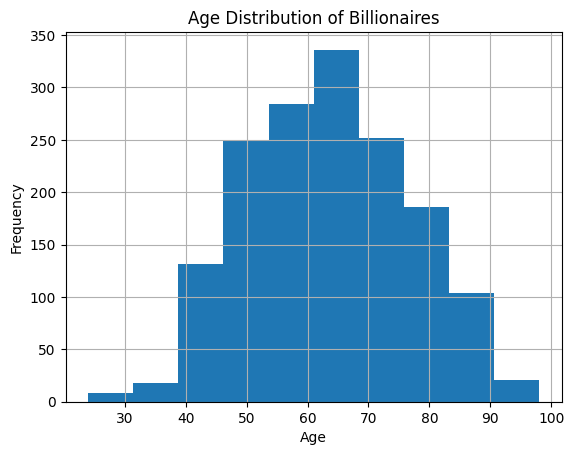

In [21]:
df['age'].hist()

plt.title('Age Distribution of Billionaires')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

## 11) Make a scatterplot of net worth compared to age

It's more fun to do this in Altair as compared to matplotlib, but either is fine.

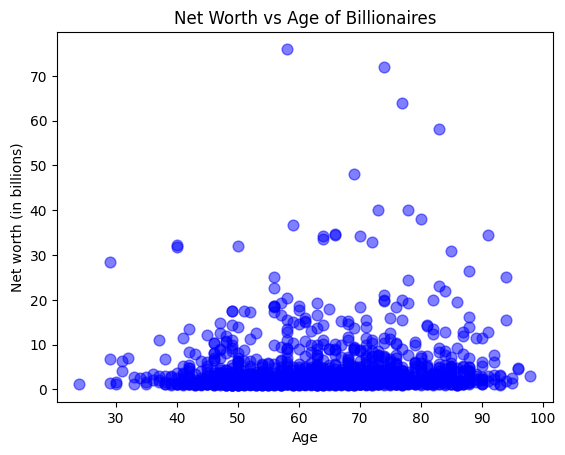

In [24]:
df_filtered = df.dropna(subset=['networthusbillion', 'age'])

plt.scatter(df_filtered['age'], df_filtered['networthusbillion'], s=60, c='b', alpha=0.5)

plt.title('Net Worth vs Age of Billionaires')
plt.xlabel('Age')
plt.ylabel('Net worth (in billions)')

plt.show()

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

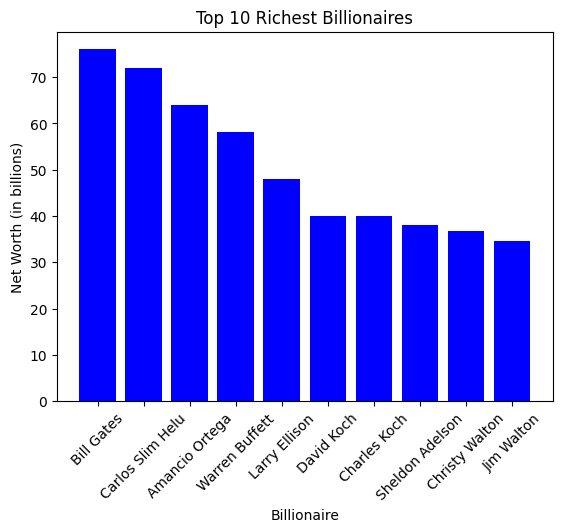

In [25]:
df_sorted = df.sort_values('networthusbillion', ascending=False)

top_10_richest = df_sorted.head(10)

plt.bar(top_10_richest['name'], top_10_richest['networthusbillion'], color='blue')

plt.title('Top 10 Richest Billionaires')
plt.xlabel('Billionaire')
plt.ylabel('Net Worth (in billions)')

plt.xticks(rotation=45)

plt.show()